In [1]:
# Import Dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [53]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [54]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [55]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [56]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [57]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [58]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [59]:
# Create our session (link) and inspector from Python to the DB
session = Session(engine)
inspector = inspect(engine)

# Exploratory Precipitation Analysis

In [60]:
# Explore the databases to get more information
# Using the inspector to print the column names within the 'measurement' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])


## Alternate way of searching data by first row
#first_row = session.query(Measurement).first()
#first_row.__dict__

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [61]:
# Explore the databases to get more information
# Using the inspector to print the column names within the 'station' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

## Alternate way of searching data by first row
#first_row = session.query(Station).first()
#first_row.__dict__

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [72]:
# Find the most recent date in the data set.
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

## Method to get last_date in list is to use max function
#last_date = session.query(func.max(Measurement.date)).all()
print(last_date[0])

2017-08-23


In [73]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Calculate the date one year from the last date in data set.
#Must sort last_date by index to get a true string for  argument 1
last_date = dt.datetime.strptime(last_date[0], '%Y-%m-%d')
year_ago = last_date - datetime.timedelta(365)

# # Perform a query to retrieve the data and precipitation scores
prcp_year = session.query(Measurement.date, Measurement.prcp).\
     filter(Measurement.date >= year_ago).\
     filter(Measurement.date <= last_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_year).set_index("date")

# Sort the dataframe by date
prcp_df.head()

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


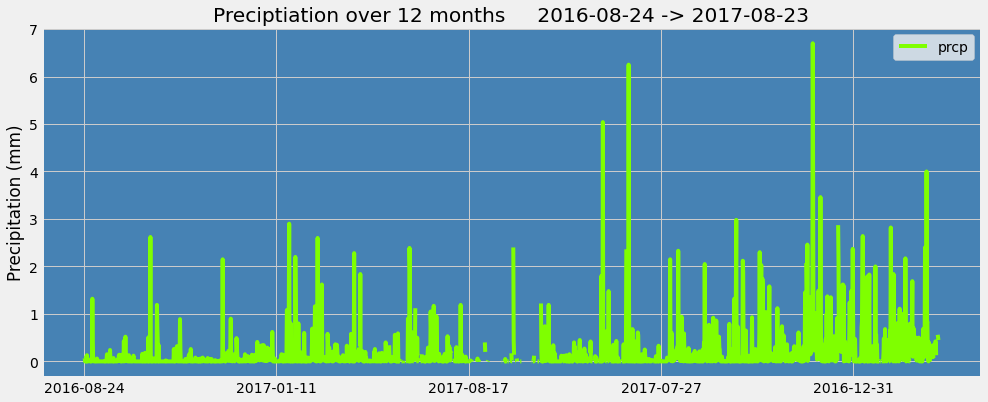

In [119]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(figsize=(15,6), color="chartreuse")
ax = plt.gca()
ax.set_facecolor("steelblue")
plt.title(f"Preciptiation over 12 months     2016-08-24 -> 2017-08-23")
plt.xlabel("")
plt.ylabel("Precipitation (mm)")

plt.savefig("images/2017_08_03_year_prior_prcp.png")
plt.show()

In [96]:
# Use Pandas to calcualte the summary statistics for the precipitation data
derscibed_prcp = prcp_df.describe()
derscibed_prcp

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [120]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Station.id).count()
print(f'There are a total of {total_stations} stations.')

There are a total of 9 stations.


In [140]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
sel = [Measurement.station, func.count(Measurement.id)]

# List the stations and the counts in descending order.
active_stations = session.query(*sel).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()

# Print most active station with count
print(f'The most active station is {active_stations[0][0]}')
print(f'totaling nuber of observations: {active_stations[0][1]}')

# Show enitre list
active_stations

The most active station is USC00519281
totaling nuber of observations: 2772


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]

temp_values = 

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()